In [2]:
import time
import json
import scipy
import pickle
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [3]:
df = pd.read_pickle('../data/shippify_icd.pkl', compression='gzip')
df = df.dropna(subset=['pickup_effective_dt', 'delivery_effective'])

In [11]:
df

,id,route_id,creation_date,delivery_type,city,cost,total_size,distance,company_id,network_id,...,pickuplat,pickuplng,pickup_location,delivery,delivery_effective,lat,long,delivery_location,items,total_weight
0,t-shiinc-21038,None,2020-08-24 20:50:27+00:00,flex,1,37.23,3,15.500000,1,1,...,-19.974600,-44.038502,"{""lat"":-19.9745815,""lng"":-44.0384907,""instruct...",2020-08-25 02:45:00+00:00,2020-08-24 22:31:33+00:00,-19.913700,-43.932301,"{""lat"":-19.9137405,""lng"":-43.9322931,""instruct...","[{""name"":""COMPUTADOR E MONITOR"",""qty"":2,""size""...",0.00
2,t-onbtes-11,r-shiinc-282480,2020-06-23 14:26:06+00:00,slot,1,7.51,2,1.600000,5891,1,...,-19.934700,-43.930000,"{""lat"":-19.9346553,""lng"":-43.9300456,""address""...",2020-07-03 21:30:06+00:00,2020-06-23 14:54:12+00:00,-19.921900,-43.936798,"{""lat"":-19.9218902,""lng"":-43.9368043,""instruct...","[{""name"":""livro"",""size"":2,""qty"":1,""price"":0,""w...",0.00
3,t-onbtes-9,r-shiinc-282480,2020-06-23 14:26:04+00:00,slot,1,11.45,3,2.300000,5891,1,...,-19.934700,-43.930000,"{""lat"":-19.9346553,""lng"":-43.9300456,""address""...",2020-07-03 21:30:08+00:00,2020-07-01 16:14:03+00:00,-19.923401,-43.939499,"{""lat"":-19.9233815,""lng"":-43.9395059,""instruct...","[{""name"":""Caderno"",""size"":3,""qty"":3,""price"":0,...",0.00
13,t-lociza-63,None,2020-06-03 20:05:33+00:00,slot,1,14.89,1,8.000000,5639,331,...,-19.938601,-43.945499,"{""lat"":-19.9385883,""lng"":-43.9455005,""address""...",2020-06-04 12:00:00+00:00,2020-06-04 11:13:27+00:00,-19.884800,-43.946999,"{""lat"":-19.8847926,""lng"":-43.947023699,""addres...","[{""name"":""Mariana"",""qty"":1,""size"":1,""price"":0,...",0.00
14,t-lociza-78,None,2020-06-05 12:38:53+00:00,slot,1,9.84,1,4.800000,5639,332,...,-19.946301,-43.969700,"{""lat"":-19.9463189,""lng"":-43.9696566,""address""...",2020-06-05 17:15:00+00:00,2020-06-05 16:24:59+00:00,-19.921000,-43.978001,"{""lat"":-19.921001,""lng"":-43.978010999,""address...","[{""name"":""Gilmara"",""qty"":1,""size"":1,""price"":0,...",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353504,t-amaste-308831,r-shiinc-369275,2020-08-26 23:16:47+00:00,slot,1,3.08,2,18.299999,2540,1,...,-19.961800,-44.028599,"{""address"":""R. José Maria Lacerda, 1900 - Cida...",2020-09-18 13:13:35+00:00,2020-09-17 18:49:42+00:00,-19.895300,-44.048801,"{""address"":""CEASA Centrais de Abastecimento de...","[{""id"":""SFYBR000314592"",""name"":""CAIXA"",""qty"":1...",0.25
353505,t-amaste-185258,r-shiinc-271188,2020-06-08 22:10:57+00:00,slot,1,3.10,2,17.799999,2540,1,...,-19.891600,-43.907902,"{""address"":""Rua Carmésia, 23 - Santa Ines, Bel...",2020-06-11 00:48:32+00:00,2020-06-10 17:28:19+00:00,-19.919800,-43.979500,"{""lat"":-19.919819,""lng"":-43.979467,""instructio...","[{""id"":""SFYBR000173593"",""qty"":1,""name"":""CAIXA""...",0.50
353506,t-amaste-185806,r-shiinc-271188,2020-06-08 22:11:34+00:00,slot,1,3.10,2,13.700000,2540,1,...,-19.891600,-43.907902,"{""address"":""Rua Carmésia, 23 - Santa Ines, Bel...",2020-06-10 17:54:58+00:00,2020-06-10 18:46:01+00:00,-19.917700,-43.987499,"{""lat"":-19.9176802,""lng"":-43.9875372,""instruct...","[{""id"":""SFYBR000174372"",""qty"":1,""name"":""CAIXA""...",0.50
353507,t-amaste-186656,r-shiinc-271188,2020-06-08 22:12:30+00:00,slot,1,3.10,2,14.800000,2540,1,...,-19.891600,-43.907902,"{""address"":""Rua Carmésia, 23 - Santa Ines, Bel...",2020-06-10 18:15:33+00:00,2020-06-10 18:55:22+00:00,-19.915701,-43.988701,"{""lat"":-19.9156597,""lng"":-43.9886926,""instruct...","[{""id"":""SFYBR000173680"",""qty"":1,""name"":""CAIXA""...",2.00


### **Agregar codigo necesario debajo de su nombre**

## Enmanuel Magallanes

In [ ]:
## Question: cual son las franjas horarias en las que se regitran mas tareas atrasadas y de que (tipo|peso) son?
## Question: Are the heaviest tasks the ones that register the most delays at the time of delivery?

In [4]:
def sum_total_weight(row):
  items = json.loads(row)
  total_weight = 0
  for item in items:
    try:
      total_weight += float(item['weight'])     
    except:
      total_weight += 0
  return total_weight

df['total_weight'] = df['items'].apply(sum_total_weight).astype('float32')

In [9]:
# Remove outlayers
z_scores = stats.zscore(df['total_weight'])
abs_z_scores = np.abs(z_scores)
filtered_entries = abs_z_scores < 3
df = df[ filtered_entries ]

<AxesSubplot:xlabel='total_weight'>

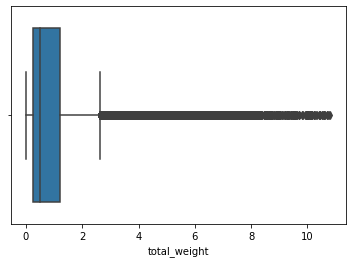

In [10]:
## Boxplot of total_weight
sns.boxplot(data=df, x='total_weight')

In [14]:
labels = ['[0,0.5) kg', '[0.5,1) kg', '[1,1.5) kg', '[1.5,2) kg', '[2,2.5) kg', '[2.5,3) kg', '[3,3.5) kg', '[3.5 kg,inf) kg']
df['class_weight'] = pd.cut(df['total_weight'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, np.inf], labels=labels, include_lowest=True)

In [18]:
df['class_weight'].value_counts()

[0,0.5) kg         176206
[0.5,1) kg          74690
[1.5,2) kg          35297
[1,1.5) kg          20836
[3.5 kg,inf) kg     18486
[2.5,3) kg          13897
[2,2.5) kg           6549
[3,3.5) kg           2082
Name: class_weight, dtype: int64

## Josue Cobos

In [ ]:
## Question: cual son las franjas horarias en las que se regitran mas tareas atrasadas y de que (tipo|peso) son?